**Analisis Exploratorio de los Datos : EDA (Exploratory Data Analysis)**

En el analisis exploratorio de los datos, de los 15 archivos previamente revisados ( revision_data), solo extraje 6, para llevar a cabo mi proyecto. 

Proyecto : **Analisis de datos sobre el acceso al Internet fijo en Argentina y su evolucion en materia de las diferentes tecnologias, infraestructura, velocidad e ingresos por la prestacion del servicio  y su Impacto en la Calidad de Servicio, tanto anivel nacional como por provincias.**

Periodo:  2014-2022 

Luego de la descarga de los 16 datasets contenidos en la APi de ENACOM: , se extrajeron estos dataframe para lograr los objetivos del proyecto.

Dataframes a analizar: 


1.- df1, df2, df3 para obtener información detallada sobre la infraestructura y tecnologías por año.(df_union)
2.- df5 para evaluar la velocidad de bajada y su variación trimestral.
3.- df12 para evaluar la distribucion de los ingresos trimestrales por la prestacion del servicio de internet fijo.
4.  df14, df15 para medir los accesos por cada 100 hogares y por cada 100 habitantes.



In [1]:
#LECTURA DE LOS DATASETS#

# Importación de Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Carga de datos


In [2]:
#Total nacional de accesos a Internet fijo por banda ancha y banda angosta
df1 = pd.read_csv("datasets/aif_ba_ba_nac.csv")
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 36 filas y 6 columnas
print(df1.shape)
df1.head()

(36, 6)


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [3]:
#Accesos a banda ancha y banda angosta por provincia
df2 = pd.read_csv("datasets/aif_ba_ba_p.csv")
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 864 filas y 6 columnas
print(df2.shape)
df2.head()

(864, 6)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [4]:
# Acceso a Internet Fijo por rangos de velocidad de bajada y provincia
df3 = pd.read_csv("datasets/aif_rvdb_p.csv")
# Muestra el datasets
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 864 filas y 12 columnas
print(df3.shape)
df3.head()

(864, 12)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


**Para obtener información detallada sobre la infraestructura y tecnologías por año uno los DataFrames df1, df2, y df3, ejecuto los siguientes pasos**


In [5]:
# Unir df1, df2, y df3 por las columnas comunes (Año, Trimestre, Provincia)
df_union = pd.merge(df1, df2, on=['Año', 'Trimestre'])
df_union = pd.merge(df_union, df3, on=['Año', 'Trimestre', 'Provincia'])

# Visualizar las primeras filas del DataFrame resultante
print(df_union.head())

    Año  Trimestre  Banda ancha fija_x  Dial up_x  Total_x       Periodo  \
0  2022          4                  11         12       11  Oct-Dic 2022   
1  2022          4                  11         12       11  Oct-Dic 2022   
2  2022          4                  11         12       11  Oct-Dic 2022   
3  2022          4                  11         12       11  Oct-Dic 2022   
4  2022          4                  11         12       11  Oct-Dic 2022   

         Provincia  Banda ancha fija_y  Dial up_y  Total_y  HASTA 512 kbps  \
0     Buenos Aires                   5        6.0        5          28.934   
1  Capital Federal                   2        2.0        2         516.000   
2        Catamarca                  71        1.0       71          71.000   
3            Chaco                 144        5.0      144         461.000   
4           Chubut                 168      904.0      169         109.000   

   + 512 Kbps - 1 Mbps + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0         

In [6]:
df_union.head()

,Año,Trimestre,Banda ancha fija_x,Dial up_x,Total_x,Periodo,Provincia,Banda ancha fija_y,Dial up_y,Total_y,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,11,12,11,Oct-Dic 2022,Buenos Aires,5,6.0,5,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,11,12,11,Oct-Dic 2022,Capital Federal,2,2.0,2,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,11,12,11,Oct-Dic 2022,Catamarca,71,1.0,71,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,11,12,11,Oct-Dic 2022,Chaco,144,5.0,144,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,11,12,11,Oct-Dic 2022,Chubut,168,904.0,169,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [7]:
# Vizualizo la informcion descriptiva y estadistica de dataframe 
print(df_union.describe())

               Año   Trimestre  Banda ancha fija_x   Dial up_x     Total_x  \
count   864.000000  864.000000          864.000000  864.000000  864.000000   
mean   2018.000000    2.500000            8.361111   23.083333    8.361111   
std       2.583484    1.118682            1.475695   10.034587    1.475695   
min    2014.000000    1.000000            6.000000   10.000000    6.000000   
25%    2016.000000    1.750000            7.000000   12.000000    7.000000   
50%    2018.000000    2.500000            8.000000   27.000000    8.000000   
75%    2020.000000    3.250000            9.250000   32.250000    9.250000   
max    2022.000000    4.000000           11.000000   39.000000   11.000000   

       Banda ancha fija_y   Dial up_y     Total_y  HASTA 512 kbps  \
count          864.000000  862.000000  864.000000      864.000000   
mean           137.326389  150.595128  137.636574      126.069829   
std            180.812265  230.167337  180.798813      186.417712   
min              1.00

In [8]:
# Contar valores nulos por columna: Se observan poca cantidad de valores NaN respecto al total de datos por lo que decido eliminarlos, 
print(df_union.isnull().sum())


Año                    0
Trimestre              0
Banda ancha fija_x     0
Dial up_x              0
Total_x                0
Periodo                0
Provincia              0
Banda ancha fija_y     0
Dial up_y              2
Total_y                0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


In [9]:
# Reemplazar NaN por 0 en el DataFrame 
df_union.fillna(0, inplace=True)

# Visualizar las primeras filas del DataFrame después del reemplazo
print(df_union.head())


    Año  Trimestre  Banda ancha fija_x  Dial up_x  Total_x       Periodo  \
0  2022          4                  11         12       11  Oct-Dic 2022   
1  2022          4                  11         12       11  Oct-Dic 2022   
2  2022          4                  11         12       11  Oct-Dic 2022   
3  2022          4                  11         12       11  Oct-Dic 2022   
4  2022          4                  11         12       11  Oct-Dic 2022   

         Provincia  Banda ancha fija_y  Dial up_y  Total_y  HASTA 512 kbps  \
0     Buenos Aires                   5        6.0        5          28.934   
1  Capital Federal                   2        2.0        2         516.000   
2        Catamarca                  71        1.0       71          71.000   
3            Chaco                 144        5.0      144         461.000   
4           Chubut                 168      904.0      169         109.000   

   + 512 Kbps - 1 Mbps + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0         

In [10]:
# Este método imprime información sobre un DataFrame, incluido el tipo de índice y las columnas, valores no nulos y uso de memoria.
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Banda ancha fija_x   864 non-null    int64  
 3   Dial up_x            864 non-null    int64  
 4   Total_x              864 non-null    int64  
 5   Periodo              864 non-null    object 
 6   Provincia            864 non-null    object 
 7   Banda ancha fija_y   864 non-null    int64  
 8   Dial up_y            864 non-null    float64
 9   Total_y              864 non-null    int64  
 10  HASTA 512 kbps       864 non-null    float64
 11  + 512 Kbps - 1 Mbps  864 non-null    float64
 12  + 1 Mbps - 6 Mbps    864 non-null    object 
 13  + 6 Mbps - 10 Mbps   864 non-null    float64
 14  + 10 Mbps - 20 Mbps  864 non-null    float64
 15  + 20 Mbps - 30 Mbps  864 non-null    flo

In [11]:
# Lista de columnas a convertir a tipo entero
columns_to_convert = ['+ 1 Mbps - 6 Mbps', '+ 30 Mbps']

# Convertir las columnas a tipo entero
df_union[columns_to_convert] = df_union[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')



In [12]:

# Visualizacion de duplicados
cantidad_duplicados = df_union.duplicated().sum()
print("Cantidad de duplicados:", cantidad_duplicados)


Cantidad de duplicados: 0


**Determino la cantidad de outliers que Banda ancha fija_y', 'Dial up_y , variables numericas con su respectivo grafico donde se visualizan los mismos.**


Outliers en la columna 'Banda ancha fija_y':
20     888
44     888
68     879
92     870
101    987
      ... 
812    520
821    577
836    512
845    567
860    506
Name: Banda ancha fija_y, Length: 68, dtype: int64


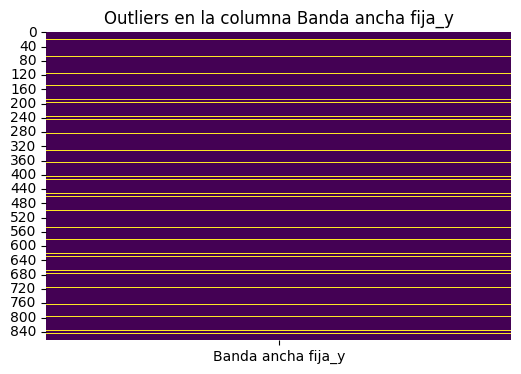


Outliers en la columna 'Dial up_y':
4      904.0
12     777.0
28     904.0
36     777.0
52     904.0
       ...  
814    755.0
833    755.0
838    766.0
857    755.0
862    766.0
Name: Dial up_y, Length: 65, dtype: float64


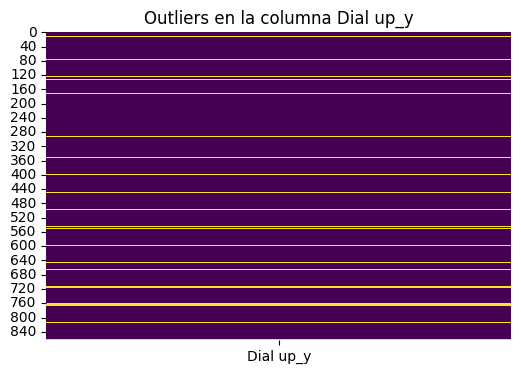

In [13]:

# Método de Tukey para encontrar outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

# Lista de columnas específicas para detectar outliers
columns_to_check = ['Banda ancha fija_y', 'Dial up_y',]

# Crear un DataFrame para almacenar información sobre valores atípicos
outliers_df = pd.DataFrame(index=df_union.index)

# Detectar outliers en las columnas específicas
for column in columns_to_check:
    outliers_df[column] = detect_outliers(df_union, column)

    # Imprimir valores atípicos en la columna
    print(f"\nOutliers en la columna '{column}':")
    print(df_union.loc[outliers_df[column], column])

    # Visualizar los outliers con colores
    plt.figure(figsize=(6, 4))
    sns.heatmap(outliers_df[[column]], cmap='viridis', cbar=False)
    plt.title(f'Outliers en la columna {column}')
    plt.show()


Valores atípicos (outliers) detectados para cada una de las columnas específicas. En este contexto, los valores atípicos son aquellos que están fuera del rango intercuartílico (IQR), según el criterio del boxplot (Diagrama de Caja). Explicare cómo interpreto estos resultados utilizando un ejemplo de la columna 'Banda ancha fija_y':

Eje x (Índice): Los números en la columna izquierda ('20', '44', '68', etc.) son los índices de las filas en el DataFrame donde se encuentran los valores atípicos.

Eje y (Valores Atípicos): Los números en la columna derecha ('888', '888', '879', etc.) son los valores específicos que se consideran atípicos en la columna 'Banda ancha fija_y'.

Las filas en este ejemplo,  que tienen estos índices ('20', '44', '68', etc.) contienen valores que están fuera del rango intercuartílico para la columna 'Banda ancha fija_y'.
Por ejemplo, en la fila con índice '20', el valor en la columna 'Banda ancha fija_y' es '888', lo que indica que este valor se considera atípico según el criterio del boxplot.

En vista a que los valores atipicos de las columnas 'Banda ancha fija_y'. y Dial up_y son pocos (133) respecto al total de datos (856 c/columna), considere no hacerle ningun tratamiento, tomando en cuenta la variabilidad geográfica y demográfica de las provincias en Argentina. Algunas provincias pueden tener características únicas que resulten en valores atípicos sin que representen errores en los datos.



In [14]:
# Calcula el total de valores atípicos por variable del Dataframe df_union 
total_outliers_por_variable = outliers_df.sum()

# Mostrar el resultado
print("Total de valores atípicos por variable:")
print(total_outliers_por_variable)

# Calcular el total general de valores atípicos en todo el conjunto de datos
total_general_valores_atipicos = outliers_df.sum().sum()

# Mostrar el total general de valores atípicos en todo el conjunto de datos
print("\nTotal general de valores atípicos en todo el conjunto de datos:", total_general_valores_atipicos)



Total de valores atípicos por variable:
Banda ancha fija_y    68
Dial up_y             65
dtype: int64

Total general de valores atípicos en todo el conjunto de datos: 133


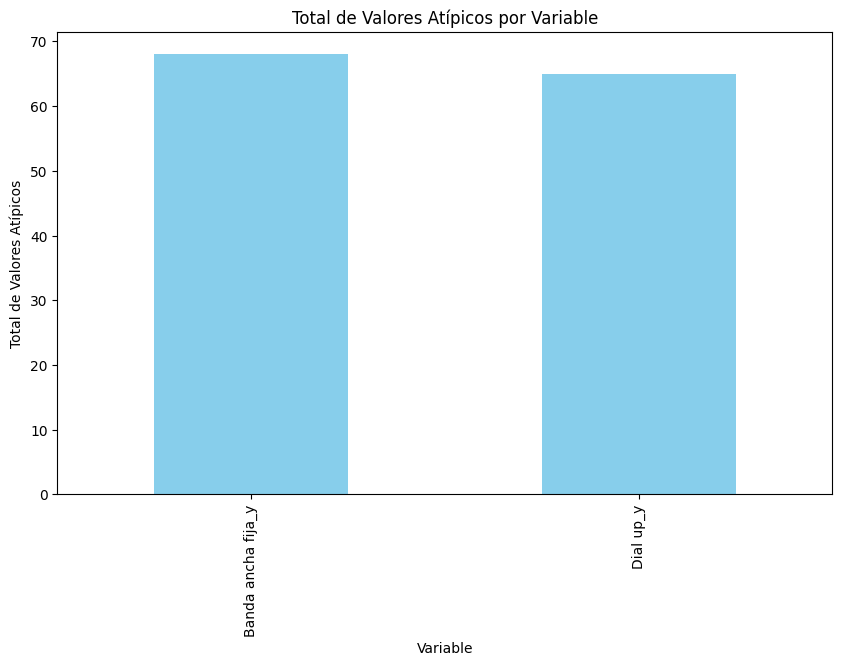

In [15]:
# Crear un gráfico de barras para mostrar el total de valores atípicos por variable
plt.figure(figsize=(10, 6))
total_outliers_por_variable.plot(kind='bar', color='skyblue')
plt.title('Total de Valores Atípicos por Variable')
plt.xlabel('Variable')
plt.ylabel('Total de Valores Atípicos')
plt.show()


# Visualizaciones: 
# 1- Evolución de Accesos por Año por tipo de red.

In [16]:
df = df_union

# Agrupamos los datos por año y calculamos la suma de 'Banda ancha fija_y' y 'Dial up_y'
grouped = df.groupby('Año')[['Banda ancha fija_y', 'Dial up_y']].sum()

# Creamos el gráfico de barras para 'Banda ancha fija_y'
trace1 = go.Bar(
    x=grouped.index,
    y=grouped['Banda ancha fija_y'],
    name='Banda ancha fija_y',
    marker_color='rgb(55, 83, 109)'
)

# Creamos el gráfico de línea para 'Dial up_y'
trace2 = go.Scatter(
    x=grouped.index,
    y=grouped['Dial up_y'],
    name='Dial up_y',
    line=dict(color='rgb(219, 64, 82)', width=2),
    yaxis='y2'
)

data = [trace1, trace2]

layout = go.Layout(
    title='Evolución de Accesos por Año',
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(title='Año'),
    yaxis=dict(title='Banda ancha fija_y'),
    yaxis2=dict(title='Dial up_y', overlaying='y', side='right'),
    showlegend=False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)
fig.show()



# Análisis del Gráfico: 
El gráfico muestra la evolución de los accesos a través de dos tecnologías: 'Banda ancha fija' y 'Dial up', a lo largo de los años.

**Banda Ancha Fija**

La 'Banda ancha fija' se representa mediante barras en el gráfico. Podemos observar que la cantidad de accesos a través de 'Banda ancha fija' ha ido aumentando a lo largo de los años. Esto podría indicar una preferencia creciente por esta tecnología debido a su velocidad y fiabilidad en comparación con 'Dial up'.

**Dial Up**

El 'Dial up' se representa mediante una línea en el gráfico. A diferencia de la 'Banda ancha fija', la cantidad de accesos a través de 'Dial up' ha ido disminuyendo a lo largo de los años. Esto podría deberse a que 'Dial up' es una tecnología más antigua y más lenta en comparación con la 'Banda ancha fija'.

**Intersección**

La intersección de la línea ('Dial up') y las barras ('Banda ancha fija') representa el punto en el tiempo donde la cantidad de accesos a través de ambas tecnologías fue la misma. A partir de ese punto, la 'Banda ancha fija' se convirtió en la tecnología dominante.

**Conclusión**

En resumen, el gráfico muestra una clara tendencia hacia el uso de la 'Banda ancha fija' en detrimento del 'Dial up'. Este cambio en las preferencias de los usuarios podría tener implicaciones importantes para los proveedores de servicios de internet, quienes podrían necesitar adaptar sus ofertas de servicios para satisfacer la creciente demanda de 'Banda ancha fija'.


# 2- Velocidad Promedio Ponderada

In [17]:
# Calculamos la cantidad de accesos y las velocidades promedio por año
grouped = df.groupby('Año')[['+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].mean().reset_index()

# Creamos el gráfico
fig = go.Figure()

# Añadimos las trazas para cada velocidad
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 512 Kbps - 1 Mbps'], mode='lines', name='+ 512 Kbps - 1 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 1 Mbps - 6 Mbps'], mode='lines', name='+ 1 Mbps - 6 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 6 Mbps - 10 Mbps'], mode='lines', name='+ 6 Mbps - 10 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 10 Mbps - 20 Mbps'], mode='lines', name='+ 10 Mbps - 20 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 20 Mbps - 30 Mbps'], mode='lines', name='+ 20 Mbps - 30 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['+ 30 Mbps'], mode='lines', name='+ 30 Mbps'))
fig.add_trace(go.Scatter(x=grouped['Año'], y=grouped['OTROS'], mode='lines', name='OTROS'))

# Configuramos el diseño del gráfico
fig.update_layout(
    title='ACCESOS DE VELOCIDAD POR AÑO',
    xaxis_title='Año',
    yaxis_title='Velocidad Promedio',
    template='plotly_white'
)

# Mostramos el gráfico
fig.show()



# Análisis del Gráfico: Accesos por Velocidad por Año

El gráfico muestra la evolución de las velocidades promedio de acceso a internet por año.

**Velocidades de Acceso**
Las velocidades de acceso se dividen en varias categorías:

- '+ 512 Kbps - 1 Mbps'
- '+ 1 Mbps - 6 Mbps'
- '+ 6 Mbps - 10 Mbps'
- '+ 10 Mbps - 20 Mbps'
- '+ 20 Mbps - 30 Mbps'
- '+ 30 Mbps'
- 'OTROS'

Cada una de estas categorías se representa con una línea en el gráfico.

**Evolución a lo Largo del Tiempo**

Al observar el gráfico, podemos ver cómo ha cambiado la velocidad promedio de acceso a internet a lo largo de los años en Argentina.  Esto nos puede dar una idea de cómo ha mejorado las tecnologías de acceso a internet con el tiempo.

**Conclusión**

Nuestro análisis muestra una evolución notable en las velocidades de acceso a internet a lo largo de los años.
Cambio hacia Velocidades Más Altas y 
Disminución en las Velocidades Más Bajas
Las velocidades de acceso a internet han mejorado significativamente con el tiempo. Esto se debe a los avances en la tecnología de redes y a las inversiones en infraestructura de banda ancha.




# Se utiliza el df5 para analizar el Acceso de Internet Fijo por Tecnologia

In [17]:
df5 = pd.read_csv("datasets/aif_t_p.csv")

In [224]:
#Acceso a Internet fijo por tecnología y provincia
#df5 = pd.read_csv("aif_t_p.csv")
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 865 filas y 9 columnas
print(df5.shape)
df5.head()


(865, 9)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


In [286]:
#Reviso las primeras filas y las estadísticas descriptivas básicas de cada dataset.
print(df5.describe())

             ADSL  Cablemodem  Fibra óptica    Wireless       Otros  \
count  864.000000  864.000000    864.000000  864.000000  864.000000   
mean    86.363426  103.291667    165.432870   57.777778  102.712963   
std    116.431490  188.849172    266.807807  156.015038  207.418981   
min      1.000000    0.000000      0.000000    0.000000    1.000000   
25%     21.000000    9.000000      9.000000    4.000000    3.000000   
50%     46.000000   35.500000     25.000000   10.000000   15.000000   
75%     81.000000   72.250000    170.750000   26.000000   47.000000   
max    720.000000  999.000000    998.000000  952.000000  987.000000   

            Total  
count  864.000000  
mean   137.636574  
std    180.798813  
min      1.000000  
25%     39.750000  
50%     91.000000  
75%    143.250000  
max    987.000000  


In [287]:
# Verificacion de datos nulos:
print(df5.isnull().sum())

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64


In [288]:
# Reemplaza todos los valores NaN por 0
df5 = df5.fillna(0)

In [289]:
# Verificacion de datos nulos: No existen datos nulos
print(df5.isnull().sum())

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [290]:
# Verificacion de variables numericas y categoricas: Se observa que no tiene datos faltantes ya que las columnas tienen
#l mismo numero de columnas#
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     865 non-null    object 
 3   ADSL          865 non-null    float64
 4   Cablemodem    865 non-null    float64
 5   Fibra óptica  865 non-null    float64
 6   Wireless      865 non-null    float64
 7   Otros         865 non-null    float64
 8   Total         865 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


In [18]:
# Reemplaza ' *' con '' en la columna 'Año'
df5['Año'] = df5['Año'].str.replace(' *', '')

# Elimina las filas donde la columna 'Año' es solo '*'
df5 = df5[df5['Año'] != '*']

In [292]:
# Vizualizo la informacion del dataframe
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    object 
 1   Trimestre     864 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.5+ KB


In [19]:
# Lista de columnas a convertir a tipo entero
columns_to_convert = ['Año']

# Convertir las columnas a tipo entero
df5[columns_to_convert] = df5[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Verificar el cambio de tipos
print(df5.dtypes)

Año               int16
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object


In [42]:

# Visualizacion de duplicados
cantidad_duplicados = df5.duplicated().sum()
print("Cantidad de duplicados:", cantidad_duplicados)


Cantidad de duplicados: 0



Outliers en la columna 'ADSL':
0      326.0
24     340.0
44     184.0
48     351.0
53     179.0
       ...  
821    338.0
836    324.0
841    446.0
845    337.0
860    323.0
Name: ADSL, Length: 108, dtype: float64
Total de outliers en 'ADSL': 108


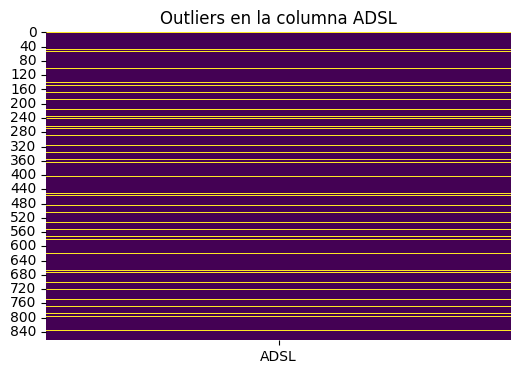


Outliers en la columna 'Cablemodem':
5      457.0
20     412.0
29     465.0
44     426.0
53     468.0
       ...  
844    539.0
845    226.0
857    434.0
858    428.0
860    174.0
Name: Cablemodem, Length: 140, dtype: float64
Total de outliers en 'Cablemodem': 140


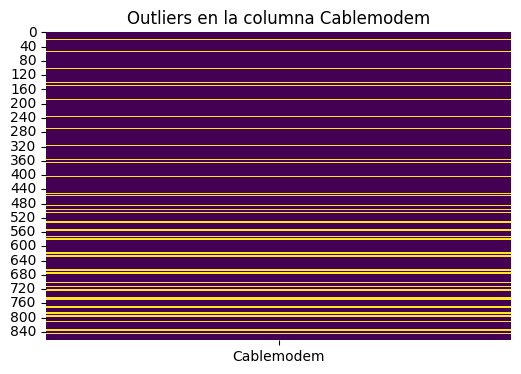


Outliers en la columna 'Fibra óptica':
94     416.0
118    426.0
120    886.0
141    909.0
144    854.0
       ...  
850    513.0
854    997.0
855    876.0
857    722.0
862    648.0
Name: Fibra óptica, Length: 130, dtype: float64
Total de outliers en 'Fibra óptica': 130


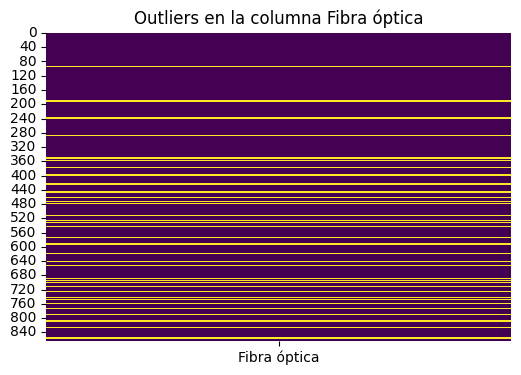


Outliers en la columna 'Wireless':
0      130.0
5       62.0
18      82.0
22     157.0
24     127.0
       ...  
829    150.0
837    907.0
853    150.0
857    808.0
861    915.0
Name: Wireless, Length: 134, dtype: float64
Total de outliers en 'Wireless': 134


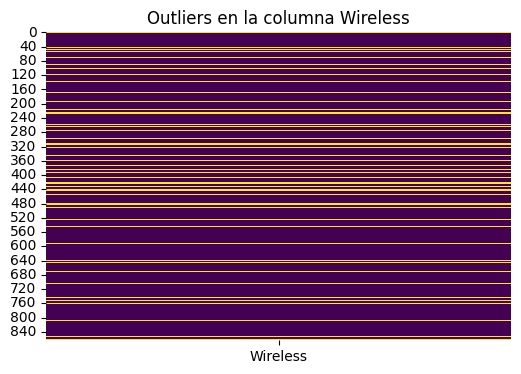


Outliers en la columna 'Otros':
8      227.0
18     511.0
19     662.0
22     651.0
23     527.0
       ...  
847    133.0
850    701.0
856    568.0
858    448.0
860    644.0
Name: Otros, Length: 150, dtype: float64
Total de outliers en 'Otros': 150


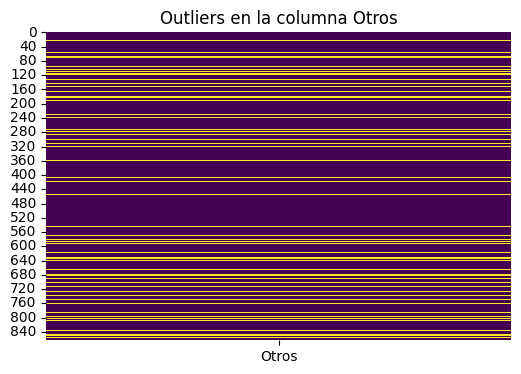

Total de outliers en 'df5': 662


In [294]:
# Método de Tukey para encontrar outliers # En total hay 662 valores atipicos en las variables numericas del df5
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

# Lista de columnas específicas para detectar outliers
columns_to_check = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear un DataFrame para almacenar información sobre valores atípicos
outliers_df = pd.DataFrame(index=df5.index)

# Detectar outliers en las columnas específicas
total_outliers = 0
for column in columns_to_check:
    outliers_df[column] = detect_outliers(df5, column)
    num_outliers = outliers_df[column].sum()
    total_outliers += num_outliers

    # Imprimir valores atípicos en la columna
    print(f"\nOutliers en la columna '{column}':")
    print(df5.loc[outliers_df[column], column])
    print(f"Total de outliers en '{column}': {num_outliers}")

    # Visualizar los outliers con colores
    plt.figure(figsize=(6, 4))
    sns.heatmap(outliers_df[[column]], cmap='viridis', cbar=False)
    plt.title(f'Outliers en la columna {column}')
    plt.show()

print(f"Total de outliers en 'df5': {total_outliers}")


**Tratamiento de los outliers o valores faltantes de las columnas numericas utilizando el método de Tukey. Los outliers serán reemplazados por el límite inferior o superior del rango intercuartílico, según corresponda.**

In [295]:
# Método de Tukey para encontrar y tratar outliers
def treat_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Lista de columnas específicas para tratar outliers
columns_to_check = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Tratar outliers en las columnas específicas
for column in columns_to_check:
    df5 = treat_outliers(df5, column)

# Imprimir el dataframe tratado sin outliers
print(df5)


      Año Trimestre            Provincia   ADSL  Cablemodem  Fibra óptica  \
0    2022         4         Buenos Aires  171.0       3.000         1.000   
1    2022         4      Capital Federal  139.0       1.000       139.000   
2    2022         4            Catamarca    9.0      11.000        47.000   
3    2022         4                Chaco   25.0      61.000        47.000   
4    2022         4               Chubut   45.0      74.000        10.000   
..    ...       ...                  ...    ...         ...           ...   
859  2014         1           Santa Cruz   19.0     100.000       381.000   
860  2014         1             Santa Fe  171.0     167.125         3.000   
861  2014         1  Santiago Del Estero   33.0       4.000        19.000   
862  2014         1     Tierra Del Fuego   22.0       3.000       413.375   
863  2014         1              Tucumán  130.0      83.000       121.000   

     Wireless  Otros  Total  
0        59.0   72.0    5.0  
1         5.0  

# Matriz de correlación

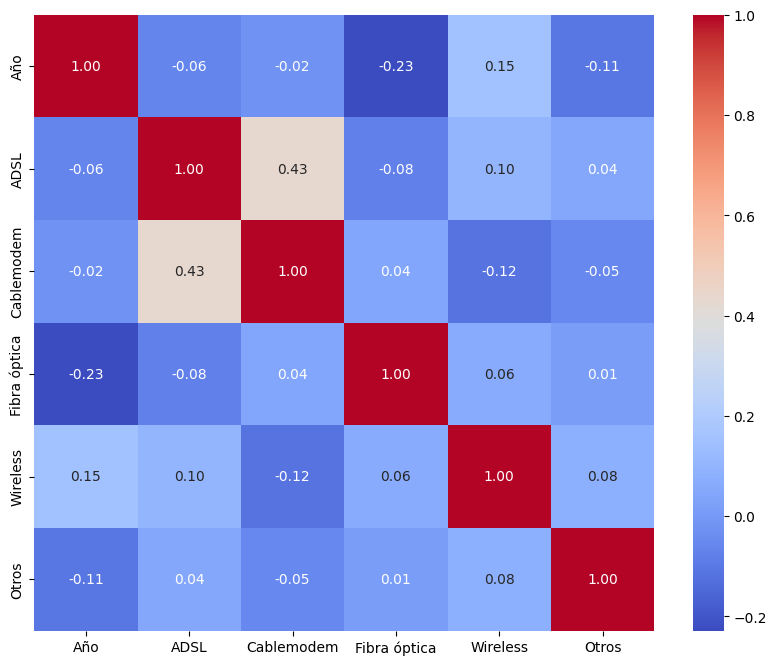

In [296]:
# Seleccionar solo las columnas numéricas    
numeric_columns = ['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros',]
df_numeric = df5[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Generar un mapa de calor en el eje
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Mostrar el gráfico
plt.show()



La matriz de correlación es una tabla que muestra los coeficientes de correlación entre las variables numericas. Un coeficiente de correlación de 1 significa que hay una correlación positiva perfecta entre las dos variables, mientras que un coeficiente de -1 significa que hay una correlación negativa perfecta. Un coeficiente de 0 significa que no hay correlación.Por lo tanto, no existe correlacion entre las variables.

# Uso de tecnología por trimestre en 2022

In [37]:
# Filtrar el Dataframe para el año 2022
df_2022 = df5[df5['Año'] == 2022]

# Crear un dataframe de larga forma para el gráfico
df_long = df_2022.melt(id_vars=['Trimestre'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], var_name='Tecnología', value_name='Uso')

# Cambiar el tipo de datos de la columna 'Trimestre' a numérico
df_long['Trimestre'] = pd.to_numeric(df_long['Trimestre'])

# Ordenar el dataframe por 'Trimestre' en orden descendente
df_long = df_long.sort_values('Trimestre', ascending=True)

# Crear gráficos de pastel separados para cada trimestre
fig = px.pie(df_long, names='Tecnología', values='Uso', title="Uso de tecnología por trimestre en 2022", facet_col="Trimestre", hole=0.3)

# Mostrar el gráfico
fig.show()



Los gráficos de pastel muestra la participación de diferentes tipos de tecnología en el acceso a internet en Argentina durante el año 2022 por cada uno de los trimestres.  Los tipos de tecnología incluyen ADSL, Cablemodem, Fibra óptica, Wireless y Otros.

# Información Clave

**Distribución de Tecnología:**
 El gráfico proporciona una visión clara de cómo se distribuye el acceso a internet entre diferentes tipos de tecnología. Esto puede ayudar a identificar qué tecnologías son más populares y cuáles son menos utilizadas. Se observa que la Fibra Optica es la que abarca la mayor cantidad del mercado. 

**Tendencias de Uso:** 
Al observar los porcentajes, podemos identificar las tendencias de uso de diferentes tecnologías. Por ejemplo, si una tecnología tiene un porcentaje alto, significa que es ampliamente utilizada para el acceso a internet.

**Oportunidades de Mercado:**
 Las tecnologías con porcentajes más bajos pueden representar oportunidades de mercado. Estas tecnologías pueden ser áreas en las que se podría invertir para mejorar la infraestructura y aumentar su uso.

**Beneficios para el Cliente:**
Este gráfico puede ser útil para nuestros clientes de varias maneras:

**Planificación Estratégica:** Los clientes pueden utilizar esta información para planificar estrategias de negocio, como invertir en tecnologías específicas o mejorar las existentes.

**Toma de Decisiones:** Este gráfico puede ayudar en la toma de decisiones al proporcionar una visión clara de las tendencia en el uso del tipo de tecnologia 

 **Se utiliza el df12 para analizar los ingresos generados trimestralmente por la prestacion del servicio de Internet fijo.**

In [46]:
#Ingresos trimestrales por la prestación del servicio de Internet fijo
df12= pd.read_csv("datasets/ing_tri_if.csv")
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 36 y 5 columnas
print(df12.shape)
df12.head()

(36, 4)


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


In [301]:
#Reviso las primeras filas y las estadísticas descriptivas básicas de cada dataset.
print(df12.describe())

               Año  Trimestre  Ingresos (miles de pesos)
count    36.000000  36.000000                  36.000000
mean   2018.000000   2.500000                  21.888889
std       2.618615   1.133893                  19.239510
min    2014.000000   1.000000                   3.000000
25%    2016.000000   1.750000                   6.750000
50%    2018.000000   2.500000                  14.500000
75%    2020.000000   3.250000                  32.500000
max    2022.000000   4.000000                  72.000000


In [302]:
# Verificacion de datos nulos: No existen datos nulos
print(df12.isnull().sum())

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [303]:
# Verificacion de variables numericas y categoricas: Se observa que no tiene datos faltantes ya que las columnas tienen
#l mismo numero de columnas#
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [47]:

# Visualizacion de duplicados
cantidad_duplicados = df12.duplicated().sum()
print("Cantidad de duplicados:", cantidad_duplicados)


Cantidad de duplicados: 0


In [45]:
# Identificacion de Outliers Se encuentran pocos outliers en la columna de Ingresos 
Q1 = df12['Ingresos (miles de pesos)'].quantile(0.25)
Q3 = df12['Ingresos (miles de pesos)'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = df12[(df12['Ingresos (miles de pesos)'] < lower_limit) | (df12['Ingresos (miles de pesos)'] > upper_limit)]

# Mostrar los valores atípicos
print("Valores atípicos:")
print(outliers)


Valores atípicos:
    Año  Trimestre  Ingresos (miles de pesos)       Periodo
0  2022          4                         72  Oct-Dic 2022


In [44]:
# Ingresos trimestrales por la prestacion del servicio de internet fijo Argentina 2014-2022

fig = px.bar(df12, x='Año', y='Ingresos (miles de pesos)', color='Año', title='Ingresos por Año',
             labels={'Ingresos (miles de pesos)': 'Ingresos (miles de pesos)'},
             color_discrete_sequence=px.colors.sequential.Blues)  # Paleta de colores azules

# Desactivar rayas dentro de cada barra
fig.update_traces(marker=dict(line=dict(width=0)))

# Resaltar el título
fig.update_layout(
    title={
        'text': "Ingresos por Año en Pesos",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=24,
            color="black")
    }
)

# Mostrar el gráfico
fig.show()


*Análisis del Gráfico de Barras: Ingresos por Año*
El gráfico de barras muestra los ingresos por año. Cada barra representa un año específico, y la altura de la barra indica la cantidad de ingresos en miles de pesos para ese año. Los colores de las barras representan diferentes años, lo que facilita la comparación visual de los ingresos entre los años.

**Puntos Clave**
**Tendencias a lo largo del tiempo:**
 El gráfico permite identificar fácilmente las tendencias en los ingresos a lo largo del tiempo. Las barras están aumentando de altura de izquierda a derecha, eso indica un aumento en los ingresos a lo largo de los años. 

**Comparación año tras año:**
 Los colores permiten comparar rápidamente los ingresos de un año con los de otro. Esto puede ser útil para identificar cualquier año que haya sido particularmente bueno o malo en términos de ingresos.

**Resumen visual:**
El gráfico de barras nos proporciona una representación visual de los datos que puede ser más intuitiva y accesible que una tabla de números. Esto puede facilitar la comprensión de los patrones y tendencias en los datos.


**Se utiliza el df14 para analizar la penetracion del Internet fijo por Accesos por cada 100 hogares y Accesos por cada 100 hab**

In [48]:
# Penetración por hogares nacional de Internet fijo
df14= pd.read_csv("datasets/pen_if_hog_nac.csv")
# Mostrar las primeras filas y estadísticas descriptivas : El dataset consta de 36 y 5 columnas
print(df14.shape)
df14.head()

(36, 5)


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [306]:
#Reviso las primeras filas y las estadísticas descriptivas básicas de cada dataset.
print(df14.describe())

               Año  Trimestre
count    36.000000  36.000000
mean   2018.000000   2.500000
std       2.618615   1.133893
min    2014.000000   1.000000
25%    2016.000000   1.750000
50%    2018.000000   2.500000
75%    2020.000000   3.250000
max    2022.000000   4.000000


In [307]:
# Verificacion de datos nulos: No existen datos nulos
print(df14.isnull().sum())

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64


In [308]:
# Verificacion de variables numericas y categoricas: Se observa que no tiene datos faltantes ya que las columnas tienen
#l mismo numero de columnas#
df14.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [309]:
# Convertir las columnas a tipo numérico
df14['Accesos por cada 100 hogares'] = pd.to_numeric(df14['Accesos por cada 100 hogares'].str.replace(',', '.'))
df14['Accesos por cada 100 hab'] = pd.to_numeric(df14['Accesos por cada 100 hab'].str.replace(',', '.'))


In [49]:

# Visualizacion de duplicados
cantidad_duplicados = df14.duplicated().sum()
print("Cantidad de duplicados:", cantidad_duplicados)


Cantidad de duplicados: 0


# Identificación de outliers

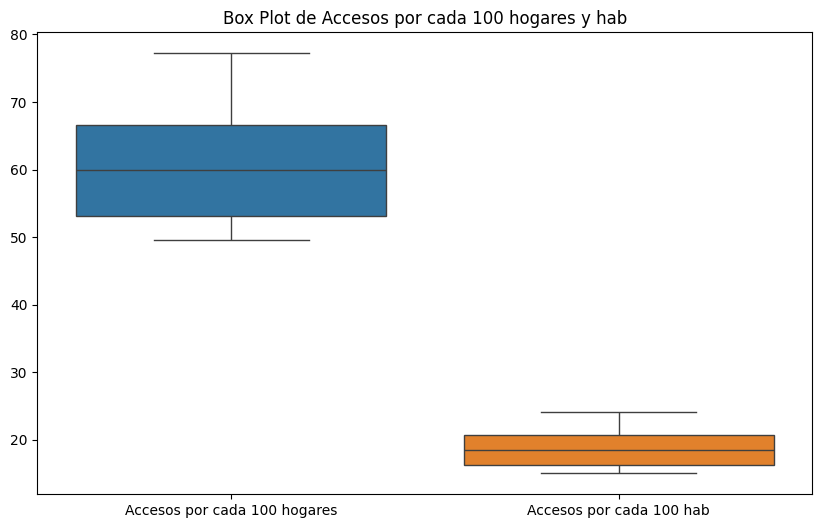

       Accesos por cada 100 hogares  Accesos por cada 100 hab
count                     36.000000                 36.000000
mean                      60.745833                 18.760278
std                        8.513140                  2.782531
min                       49.550000                 15.050000
25%                       53.162500                 16.307500
50%                       59.925000                 18.485000
75%                       66.637500                 20.695000
max                       77.210000                 24.150000
Filas con outliers en Accesos por cada 100 hogares:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []
Filas con outliers en Accesos por cada 100 hab:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []

Número de outliers en Accesos por cada 100 hogares: 0
Número de outliers en Accesos por cada 100 hab: 0
Tot

In [310]:
# Identicar outliers
df14['Accesos por cada 100 hogares'] = df14['Accesos por cada 100 hogares'].apply(lambda x: pd.to_numeric(str(x).replace(',', '.'), errors='coerce'))
df14['Accesos por cada 100 hab'] = df14['Accesos por cada 100 hab'].apply(lambda x: pd.to_numeric(str(x).replace(',', '.'), errors='coerce'))

# Visualizar box plots para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df14[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']])
plt.title('Box Plot de Accesos por cada 100 hogares y hab')
plt.show()

# Calcular estadísticas resumen
summary_stats = df14[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].describe()
print(summary_stats)

# Identificar filas con valores atípicos
outliers_hogares = df14[(df14['Accesos por cada 100 hogares'] > summary_stats.loc['75%', 'Accesos por cada 100 hogares'] + 1.5 * (summary_stats.loc['75%', 'Accesos por cada 100 hogares'] - summary_stats.loc['25%', 'Accesos por cada 100 hogares']))
                        | (df14['Accesos por cada 100 hogares'] < summary_stats.loc['25%', 'Accesos por cada 100 hogares'] - 1.5 * (summary_stats.loc['75%', 'Accesos por cada 100 hogares'] - summary_stats.loc['25%', 'Accesos por cada 100 hogares']))]

outliers_hab = df14[(df14['Accesos por cada 100 hab'] > summary_stats.loc['75%', 'Accesos por cada 100 hab'] + 1.5 * (summary_stats.loc['75%', 'Accesos por cada 100 hab'] - summary_stats.loc['25%', 'Accesos por cada 100 hab']))
                    | (df14['Accesos por cada 100 hab'] < summary_stats.loc['25%', 'Accesos por cada 100 hab'] - 1.5 * (summary_stats.loc['75%', 'Accesos por cada 100 hab'] - summary_stats.loc['25%', 'Accesos por cada 100 hab']))]

print("Filas con outliers en Accesos por cada 100 hogares:")
print(outliers_hogares)

print("Filas con outliers en Accesos por cada 100 hab:")
print(outliers_hab)

# Contar outliers por variable y total
num_outliers_hogares = outliers_hogares.shape[0]
num_outliers_hab = outliers_hab.shape[0]
total_outliers = num_outliers_hogares + num_outliers_hab

print(f"\nNúmero de outliers en Accesos por cada 100 hogares: {num_outliers_hogares}")
print(f"Número de outliers en Accesos por cada 100 hab: {num_outliers_hab}")
print(f"Total de outliers: {total_outliers}")


Los resultados indican que no hay filas que cumplan con la definición de outliers según el método utilizado en el análisis de caja (box plot). En otras palabras, no hay valores atípicos en las columnas "Accesos por cada 100 hogares" ni "Accesos por cada 100 hab" según el criterio de 1.5 veces el rango intercuartílico por encima del tercer cuartil o por debajo del primer cuartil.

# Matriz de Correlación

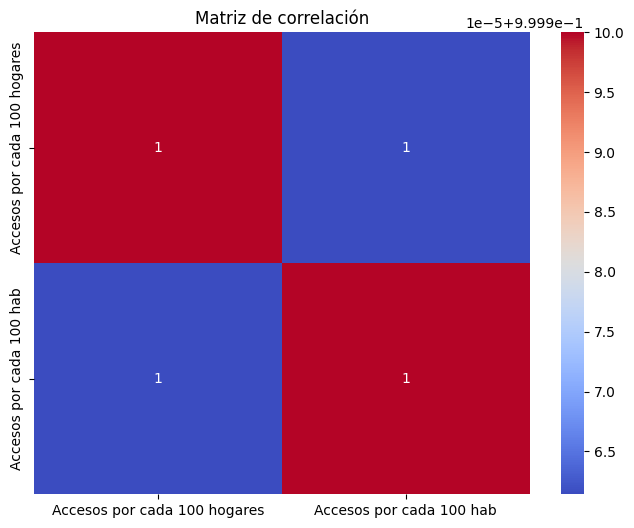

In [311]:
# Selecciona solo las columnas que quieres correlacionar
columnas = ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
df14_seleccionado = df14[columnas]

# Calcula la matriz de correlación
matriz_correlacion = df14_seleccionado.corr()

# Crea un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

plt.title('Matriz de correlación')
plt.show()



La matriz de correlación siempre tendrá 1s en la diagonal. Esto se debe a que cada variable tiene una correlación perfecta consigo misma. Por lo tanto, ‘Accesos por cada 100 hogares’ tendrá una correlación de 1 con ‘Accesos por cada 100 hogares’, y ‘Accesos por cada 100 hab’ tendrá una correlación de 1 con ‘Accesos por cada 100 hab’.

# Accesos por cada 100 hogares y 100 habitantes por Año

In [312]:

# Crear la visualización de barras apiladas
fig = px.bar(df14, x='Año', y=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'],
             labels={'value': 'Accesos'},
             title='Accesos por cada 100 hogares y 100 hab por Año',
             template='plotly_dark',
             barmode='group')  # Utiliza barmode='group' para barras agrupadas en lugar de apiladas

# Mostrar la figura
fig.show()

# Análisis de Accesos por cada 100 hogares y 100 hab por Año

El gráfico de barras presenta una comparación visual entre los accesos por cada 100 hogares y accesos por cada 100 habitantes a lo largo de varios años (desde 2014 hasta 2022). La representación gráfica permite identificar patrones y tendencias en la evolución de estos indicadores.

## Observaciones clave:

- **Accesos por cada 100 hogares:**
  - Se observa un aumento constante en los accesos por cada 100 hogares desde 2014 hasta 2023.
  - Los años más recientes muestran un crecimiento significativo en comparación con los años anteriores.
 
- **Accesos por cada 100 habitantes:**
  - Similar a los accesos por hogar, se aprecia un aumento general en los accesos por cada 100 habitantes a lo largo de los años.
  - Puede notarse alguna variabilidad entre años específicos que podría requerir una investigación adicional.
 
## Conclusiones:
- Ambos indicadores sugieren un aumento positivo en la conectividad a lo largo del tiempo, indicando posiblemente una mayor adopción de servicios de telecomunicaciones.

- Este análisis proporciona una visión general de cómo han evolucionado los accesos a lo largo de los años y puede ser útil para tomar decisiones estratégicas relacionadas con la infraestructura de telecomunicaciones.
